Paulo José pereira Júnior

Gráficos da página 6 e 7(pdf e cdf)

PMF


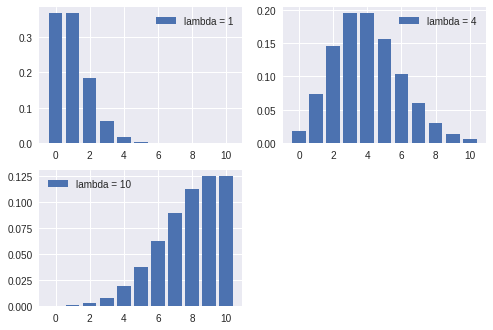

In [330]:
#plotting pdf graphics

import matplotlib.pyplot as plt
import math

def poispmf(lmbd, k):
    pmf = ((lmbd**k)/math.factorial(k))*math.exp(-lmbd)
    return pmf

def array_pmf(lmbd, limit):
    pmf = []
    for i in range(0,int(limit)):
        pmf.append(poispmf(lmbd, i))
    return pmf
    

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

counts = list(range(11))
lmbd = 1
ax1.bar(counts, array_pmf(lmbd,len(counts)))
ax1.legend(["lambda = " + str(lmbd)])


lmbd = 4
ax2.bar(counts, array_pmf(lmbd,len(counts)))
ax2.legend(["lambda = " + str(lmbd)])

lmbd = 10
ax3.bar(counts, array_pmf(lmbd,len(counts)))
ax3.legend(["lambda = " + str(lmbd)])



print("PMF")
plt.show()

CDF


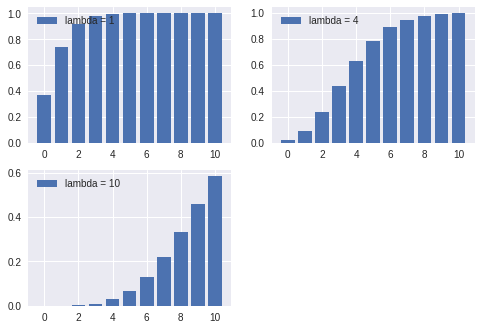

In [111]:
import matplotlib.pyplot as plt
import math

def poiscdf(lmbd, k):
    cdf = 0
    for i in range(0,int(k)+1):
        cdf += (lmbd**i/math.factorial(i))*math.exp(-lmbd)
    return cdf

def array_cdf(lmbd, limit):
    cdf = []
    for i in counts:
        cdf.append(poiscdf(lmbd, i))
    return cdf

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

counts = list(range(11))
lmbd = 1
ax1.bar(counts, array_cdf(lmbd,counts))
ax1.legend(["lambda = " + str(lmbd)])

lmbd = 4
ax2.bar(counts, array_cdf(lmbd,counts))
ax2.legend(["lambda = " + str(lmbd)])

lmbd = 10
ax3.bar(counts, array_cdf(lmbd,counts))
ax3.legend(["lambda = " + str(lmbd)])

print("CDF")
plt.show()

Gráficos restantes(scatterplots)

    -Página 10

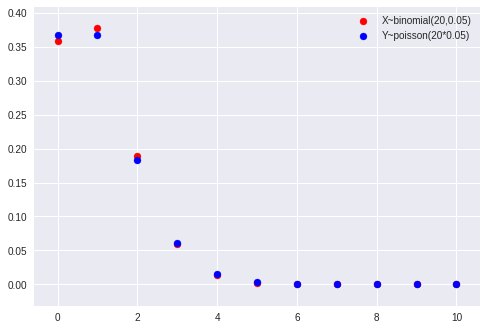

In [328]:
from scipy.stats import binom
import matplotlib.pyplot as plt

def find_probability(N, k, p, q):
    
    probability = math.pow(p,k)*math.pow(q,N-k)*math.factorial(N)/(math.factorial(k)*(math.factorial(N-k)))
    
    return probability

outcome_counts = list(range(11))
outcome_probs = [find_probability(20, i, 0.05, 1 - 0.05) for i in outcome_counts]

poisson = array_pmf(1,11)
binomial = binom.pmf(outcome_counts,20,0.05)

plt.scatter(x=list(range(11)),y=binomial,color="red")
plt.scatter(x=list(range(11)),y=poisson,color="blue")
plt.legend(["X~binomial(20,0.05)","Y~poisson(20*0.05)"])
plt.show()

    -Página 15

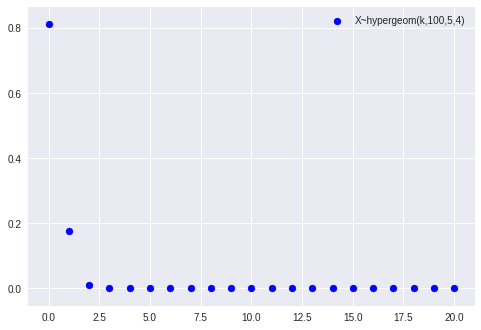

In [326]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import math

def combinacao(a,b):
    result = 0
    if(a-b>=0):
        result = math.factorial(a)/(math.factorial(b)*math.factorial(a-b))
    if(a-b<0):
        result = math.factorial(a)/(math.factorial(b)*math.factorial(0))
    return result


def hyper_pmf(n,d,m,length):
    result = []
    for i in range(0,length):
        if(m-i>=0):
            result.append( combinacao(d,i) * combinacao(n-d,m-i) / combinacao(n,m) )
        if(m-i<0):
            result.append( combinacao( d,i) * combinacao(n-d,0) / combinacao(n,m) )
    return result

plt.scatter(x=list(range(21)),y=hyper_pmf(100,5,4,21),color="blue")
plt.legend(["X~hypergeom(k,100,5,4)"])
plt.show()

    -Página 16

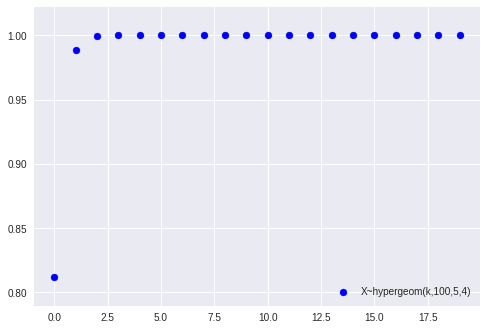

In [324]:
from scipy.stats import binom
import matplotlib.pyplot as plt
import math

def hyper_cdf(n,d,m,length):
    pmf = hyper_pmf(n,d,m,length)
    result = []
    for i in range(0,len(pmf)+1):
        soma = 0
        for j in range(0,i):
            soma += pmf[j]
        if(soma!=0):
            result.append(soma)
    return result
    
plt.scatter(x=list(range(20)),y=hyper_cdf(100,5,4,20),color="blue")
plt.legend(["X~hypergeom(k,100,5,4)"],loc=4)
plt.show()
